In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from random import gauss
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats as stats
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.dummy import DummyRegressor

%matplotlib inline
pd.set_option('display.max_columns', None) #shows all columns on dataframe
pd.set_option('display.float_format', lambda x: '%.2f' % x) #applied to every df in this notebook

In [2]:
df = pd.read_csv('./data/kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.00,3,1.00,1180,5650,1.00,NaN,NONE,Average,7 Average,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,538000.00,3,2.25,2570,7242,2.00,NO,NONE,Average,7 Average,2170,400.0,1951,1991.00,98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,180000.00,2,1.00,770,10000,1.00,NO,NONE,Average,6 Low Average,770,0.0,1933,nan,98028,47.74,-122.23,2720,8062
3,2487200875,12/9/2014,604000.00,4,3.00,1960,5000,1.00,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,510000.00,3,2.00,1680,8080,1.00,NO,NONE,Average,8 Good,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
df['condition'].value_counts()
#difficult to make reccomendation base off of this since there's a lot of ways to define these terms
#use grade which is a little less vague

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [6]:
df['yr_renovated'].value_counts()
#dropping columns base on the number of zeros
#potentially compared the zeros to the those that have ben renovated to see if there is a significant difference

0.00       17011
2014.00       73
2003.00       31
2013.00       31
2007.00       30
           ...  
1946.00        1
1959.00        1
1971.00        1
1951.00        1
1954.00        1
Name: yr_renovated, Length: 70, dtype: int64

In [7]:
#think that view might be important so we drop the nulls there for now
df_copy = df.copy()
df_copy = df_copy.dropna(subset = ['view'])

In [8]:
df_copy = df_copy.sort_values(by=['id', 'date'])
df_copy = df_copy.drop_duplicates(subset=['id'], keep='last')

In [9]:
numbers = df_copy.select_dtypes(np.number)

In [10]:
df_2 = numbers.drop(['id', 'lat', 'long', 'zipcode'], axis = 1)
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21357 entries, 2494 to 15937
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21357 non-null  float64
 1   bedrooms       21357 non-null  int64  
 2   bathrooms      21357 non-null  float64
 3   sqft_living    21357 non-null  int64  
 4   sqft_lot       21357 non-null  int64  
 5   floors         21357 non-null  float64
 6   sqft_above     21357 non-null  int64  
 7   yr_built       21357 non-null  int64  
 8   yr_renovated   17565 non-null  float64
 9   sqft_living15  21357 non-null  int64  
 10  sqft_lot15     21357 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 2.0 MB


In [11]:
#picture = sns.pairplot(numbers)

In [12]:
#fig, ax = plt.subplots(figsize=(10,10))
#heat = sns.heatmap(df_2.corr(), annot = True)
#plt.savefig('heat.png',bbox = 'tight')

In [13]:
#visually the price of average, fair and good look the about the same so we would need to run a significant test to see
#excellent and none looks to be potentially significant
#use of anova here to see and ad-hoc tests

In [14]:
df_copy.yr_renovated.fillna(value = 0, inplace = True)
#fill them with zero, might be mention in the next step to look at
#for now we can drop 

In [15]:
#we have some of the houses appearing more than once so we are trying to drop
#trial = copy_df.groupby(['id']).date.transform(max)
#trial_cleaned = copy_df[copy_df.id == trial]

In [16]:
df3 = df_copy.copy()
df3['view'] = df3['view'].str.replace('AVERAGE', 'FAIR')

df3.view.value_counts()

NONE         19253
FAIR          1285
GOOD           505
EXCELLENT      314
Name: view, dtype: int64

In [17]:
df_copy.view.value_counts()

NONE         19253
AVERAGE        956
GOOD           505
FAIR           329
EXCELLENT      314
Name: view, dtype: int64

In [18]:
#df3.drop(df3.loc[df3['grade'] == '3 Poor'],axis = 1, inplace= True)

In [73]:
# Drop the 3 Poor value since it only has a sample size of 1
df3 = df3[df3['grade'] != '3 Poor']

In [72]:
df3[df3['grade'] == '3 Poor'] 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [19]:
#making the categorical variable
cate_column = df3[['grade', 'view']]

cate_column

,grade,view
2494,7 Average,NONE
6729,8 Good,NONE
8404,7 Average,NONE
8800,6 Low Average,NONE
3553,7 Average,NONE
...,...,...
16723,7 Average,NONE
3257,7 Average,NONE
7614,7 Average,NONE
20963,9 Better,NONE


In [20]:
ohe = OneHotEncoder(drop='first')

column_name = ['grade', 'view']
features = cate_column.copy()

features2 = features[column_name]

cate_ohe = ohe.fit_transform(features2)

cate_ohe

<21357x13 sparse matrix of type '<class 'numpy.float64'>'
	with 41274 stored elements in Compressed Sparse Row format>

In [21]:
name = ohe.get_feature_names()

In [22]:
cate_parsed = pd.DataFrame(cate_ohe.todense(), columns = name, index = features.index)

In [23]:
features.index

Int64Index([ 2494,  6729,  8404,  8800,  3553, 18506,  3197, 21047,  4329,
            16701,
            ...
             1714,  4675,  4817, 13015, 11642, 16723,  3257,  7614, 20963,
            15937],
           dtype='int64', length=21357)

In [24]:
cate_parsed
#X0 = grade
#x1 = view

,x0_11 Excellent,x0_12 Luxury,x0_13 Mansion,x0_3 Poor,x0_4 Low,x0_5 Fair,x0_6 Low Average,x0_7 Average,x0_8 Good,x0_9 Better,x1_FAIR,x1_GOOD,x1_NONE
2494,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
6729,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
8404,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
8800,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
3553,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16723,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
3257,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
7614,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
20963,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00


In [25]:
#to potentially drop sqft_lot and sqft_lot15
ss = StandardScaler()
#scaled_ = ss.fit_transform(df_2)

columns_name1 = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'sqft_above']
numbers_scaling = df_2.copy().drop(['yr_renovated','sqft_lot15', 'sqft_lot', 'yr_built'], axis = 1)

features= numbers_scaling[columns_name1]

scale1 = ss.fit(features)
scale2 = scale1.transform(features)
numbers_scaling[columns_name1] = scale2

numbers_scaling

,price,bedrooms,bathrooms,sqft_living,floors,sqft_above,sqft_living15
2494,-0.71,2.84,1.15,0.35,0.93,0.73,2060
6729,0.29,0.68,-0.48,-0.02,-0.92,-0.76,2590
8404,-0.38,-0.40,-1.46,-0.68,-0.92,-0.40,2250
8800,-0.83,-0.40,-1.46,-0.71,0.01,-0.94,1290
3553,-0.38,0.68,-0.15,-0.47,-0.92,-1.24,1480
...,...,...,...,...,...,...,...
16723,-0.48,1.76,-0.15,-0.53,0.01,-0.23,1190
3257,-0.44,-1.48,-1.46,-1.14,-0.92,-1.15,1930
7614,-0.55,-0.40,-1.46,-1.07,-0.92,-1.29,1510
20963,-0.38,-1.48,-0.48,-0.73,0.01,-1.08,1440


In [26]:
scaled_and_parse_df = pd.concat([numbers_scaling, cate_parsed], axis = 1)

In [27]:
numbers_scaling.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21357 entries, 2494 to 15937
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21357 non-null  float64
 1   bedrooms       21357 non-null  float64
 2   bathrooms      21357 non-null  float64
 3   sqft_living    21357 non-null  float64
 4   floors         21357 non-null  float64
 5   sqft_above     21357 non-null  float64
 6   sqft_living15  21357 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 1.3 MB


In [28]:
cate_parsed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21357 entries, 2494 to 15937
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   x0_11 Excellent   21357 non-null  float64
 1   x0_12 Luxury      21357 non-null  float64
 2   x0_13 Mansion     21357 non-null  float64
 3   x0_3 Poor         21357 non-null  float64
 4   x0_4 Low          21357 non-null  float64
 5   x0_5 Fair         21357 non-null  float64
 6   x0_6 Low Average  21357 non-null  float64
 7   x0_7 Average      21357 non-null  float64
 8   x0_8 Good         21357 non-null  float64
 9   x0_9 Better       21357 non-null  float64
 10  x1_FAIR           21357 non-null  float64
 11  x1_GOOD           21357 non-null  float64
 12  x1_NONE           21357 non-null  float64
dtypes: float64(13)
memory usage: 2.3 MB


In [29]:
scaled_and_parse_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21357 entries, 2494 to 15937
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             21357 non-null  float64
 1   bedrooms          21357 non-null  float64
 2   bathrooms         21357 non-null  float64
 3   sqft_living       21357 non-null  float64
 4   floors            21357 non-null  float64
 5   sqft_above        21357 non-null  float64
 6   sqft_living15     21357 non-null  int64  
 7   x0_11 Excellent   21357 non-null  float64
 8   x0_12 Luxury      21357 non-null  float64
 9   x0_13 Mansion     21357 non-null  float64
 10  x0_3 Poor         21357 non-null  float64
 11  x0_4 Low          21357 non-null  float64
 12  x0_5 Fair         21357 non-null  float64
 13  x0_6 Low Average  21357 non-null  float64
 14  x0_7 Average      21357 non-null  float64
 15  x0_8 Good         21357 non-null  float64
 16  x0_9 Better       21357 non-null  flo

In [30]:
scaled_and_parse_df.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
floors              0
sqft_above          0
sqft_living15       0
x0_11 Excellent     0
x0_12 Luxury        0
x0_13 Mansion       0
x0_3 Poor           0
x0_4 Low            0
x0_5 Fair           0
x0_6 Low Average    0
x0_7 Average        0
x0_8 Good           0
x0_9 Better         0
x1_FAIR             0
x1_GOOD             0
x1_NONE             0
dtype: int64

In [31]:
#scaled_and_parse_df.dropna(inplace=True)

In [32]:
numbers_scaling.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21357 entries, 2494 to 15937
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21357 non-null  float64
 1   bedrooms       21357 non-null  float64
 2   bathrooms      21357 non-null  float64
 3   sqft_living    21357 non-null  float64
 4   floors         21357 non-null  float64
 5   sqft_above     21357 non-null  float64
 6   sqft_living15  21357 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 1.3 MB


In [33]:
cate_parsed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21357 entries, 2494 to 15937
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   x0_11 Excellent   21357 non-null  float64
 1   x0_12 Luxury      21357 non-null  float64
 2   x0_13 Mansion     21357 non-null  float64
 3   x0_3 Poor         21357 non-null  float64
 4   x0_4 Low          21357 non-null  float64
 5   x0_5 Fair         21357 non-null  float64
 6   x0_6 Low Average  21357 non-null  float64
 7   x0_7 Average      21357 non-null  float64
 8   x0_8 Good         21357 non-null  float64
 9   x0_9 Better       21357 non-null  float64
 10  x1_FAIR           21357 non-null  float64
 11  x1_GOOD           21357 non-null  float64
 12  x1_NONE           21357 non-null  float64
dtypes: float64(13)
memory usage: 2.3 MB


In [34]:
#for our regression and simple linear model
scaled_and_parse_df

,price,bedrooms,bathrooms,sqft_living,floors,sqft_above,sqft_living15,x0_11 Excellent,x0_12 Luxury,x0_13 Mansion,x0_3 Poor,x0_4 Low,x0_5 Fair,x0_6 Low Average,x0_7 Average,x0_8 Good,x0_9 Better,x1_FAIR,x1_GOOD,x1_NONE
2494,-0.71,2.84,1.15,0.35,0.93,0.73,2060,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
6729,0.29,0.68,-0.48,-0.02,-0.92,-0.76,2590,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
8404,-0.38,-0.40,-1.46,-0.68,-0.92,-0.40,2250,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
8800,-0.83,-0.40,-1.46,-0.71,0.01,-0.94,1290,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
3553,-0.38,0.68,-0.15,-0.47,-0.92,-1.24,1480,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16723,-0.48,1.76,-0.15,-0.53,0.01,-0.23,1190,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
3257,-0.44,-1.48,-1.46,-1.14,-0.92,-1.15,1930,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
7614,-0.55,-0.40,-1.46,-1.07,-0.92,-1.29,1510,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
20963,-0.38,-1.48,-0.48,-0.73,0.01,-1.08,1440,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00


In [35]:
#Create & Instantiate a DummyRegressor

dummy_reg = DummyRegressor()

In [36]:
#Define X and y variable using scaled & parse dataframe

X_s_p = scaled_and_parse_df['sqft_living']
y_s_p = scaled_and_parse_df['price']

In [37]:
#Fit the dummy_regressor

dummy_reg.fit(X_s_p,y_s_p)

DummyRegressor()

In [38]:
# Score it

dummy_reg.score(X_s_p,y_s_p)

0.0

In [39]:
scaled_and_parse_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21357 entries, 2494 to 15937
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             21357 non-null  float64
 1   bedrooms          21357 non-null  float64
 2   bathrooms         21357 non-null  float64
 3   sqft_living       21357 non-null  float64
 4   floors            21357 non-null  float64
 5   sqft_above        21357 non-null  float64
 6   sqft_living15     21357 non-null  int64  
 7   x0_11 Excellent   21357 non-null  float64
 8   x0_12 Luxury      21357 non-null  float64
 9   x0_13 Mansion     21357 non-null  float64
 10  x0_3 Poor         21357 non-null  float64
 11  x0_4 Low          21357 non-null  float64
 12  x0_5 Fair         21357 non-null  float64
 13  x0_6 Low Average  21357 non-null  float64
 14  x0_7 Average      21357 non-null  float64
 15  x0_8 Good         21357 non-null  float64
 16  x0_9 Better       21357 non-null  flo

In [40]:
#check for nulls, so clean to work with for regression
scaled_and_parse_df.isnull().sum().sum()

0

In [41]:
# Creating a straightforward, initial model --
# just for kicks
simple_formula = 'price ~ sqft_living'
simple_model = ols(formula = simple_formula,
                   data = scaled_and_parse_df).fit()
simple_mod_summ = simple_model.summary()

simple_mod_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                 2.068e+04
Date:                Mon, 28 Mar 2022   Prob (F-statistic):               0.00
Time:                        10:01:44   Log-Likelihood:                -23074.
No. Observations:               21357   AIC:                         4.615e+04
Df Residuals:                   21355   BIC:                         4.617e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -9.588e-17      0.005  -1.97e-14      1.000      -0.010       0.010
sqft_living     0.7014      0.005    143.793      0.000       0.692       0.711
==============================================================================
Omnibus:                    14477.646   Durbin-Watson:                   1.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           513236.206
Skew:                           2.784   Prob(JB):                         0.00
Kurtosis:                      26.361   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
# The simple regression model for price and sqft_living has an R-squared value of .49, suggesting our model
# only accounts for 50% of the variation in our data.

# Our p_value for sqft_living is 0.00 would suggest we have a statistically significant relationship to price 

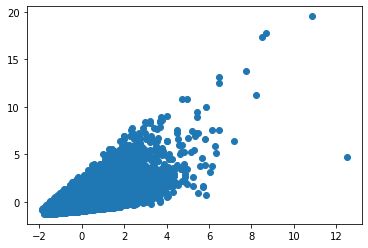

In [43]:
fig, ax = plt.subplots()

x = scaled_and_parse_df['sqft_living']
y = scaled_and_parse_df['price']


ax.scatter(x, y);

In [44]:
np.corrcoef(df['sqft_living'],df['price'])

array([[1.       , 0.7019173],
       [0.7019173, 1.       ]])

In [45]:
# passing our first assumption
# Based on our scatterplot, we can see that there is a strong correlation between sqft_living and price
# our pearson correlation coefficiant of .70 suggests that these two variables are strongly correlated 

In [46]:
df.price.corr(df['sqft_living'])

0.7019173021377595

In [47]:
## Refer to the heatmap above to multicollinearity 

In [48]:
simple_formula2 = 'price ~ sqft_living + bedrooms + bathrooms + floors + x1_FAIR + x1_GOOD + x1_NONE'
simple_model2 = ols(formula = simple_formula2,
                   data = scaled_and_parse_df).fit()
simple_mod_summ2 = simple_model2.summary()

simple_mod_summ2

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     3764.
Date:                Mon, 28 Mar 2022   Prob (F-statistic):               0.00
Time:                        10:01:44   Log-Likelihood:                -21720.
No. Observations:               21357   AIC:                         4.346e+04
Df Residuals:                   21349   BIC:                         4.352e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.5609      0.038     40.559      0.000       1.485       1.636
sqft_living     0.6925      0.008     90.520      0.000       0.677       0.707
bedrooms       -0.1184      0.006    -20.622      0.000      -0.130      -0.107
bathrooms       0.0152      0.008      1.977      0.048       0.000       0.030
floors          0.0196      0.005      3.670      0.000       0.009       0.030
x1_FAIR        -1.2556      0.042    -29.654      0.000      -1.339      -1.173
x1_GOOD        -1.0591      0.048    -21.998      0.000      -1.153      -0.965
x1_NONE        -1.6199      0.039    -41.665      0.000      -1.696      -1.544
==============================================================================
Omnibus:                    13380.346   Durbin-Watson:                   1.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           483168.480
Skew:                           2.464   Prob(JB):                         0.00
Kurtosis:                      25.774   Cond. No.                         27.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
simple_formula3 = 'price ~ sqft_living + bedrooms'
simple_model3 = ols(formula = simple_formula3,
                   data = scaled_and_parse_df).fit()
simple_mod_summ3 = simple_model3.summary()

simple_mod_summ3

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                 1.094e+04
Date:                Mon, 28 Mar 2022   Prob (F-statistic):               0.00
Time:                        10:01:44   Log-Likelihood:                -22772.
No. Observations:               21357   AIC:                         4.555e+04
Df Residuals:                   21354   BIC:                         4.557e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -9.588e-17      0.005  -1.99e-14      1.000      -0.009       0.009
sqft_living     0.7859      0.006    133.253      0.000       0.774       0.797
bedrooms       -0.1460      0.006    -24.751      0.000      -0.158      -0.134
==============================================================================
Omnibus:                    14052.085   Durbin-Watson:                   1.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           458591.005
Skew:                           2.690   Prob(JB):                         0.00
Kurtosis:                      25.055   Cond. No.                         1.94
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

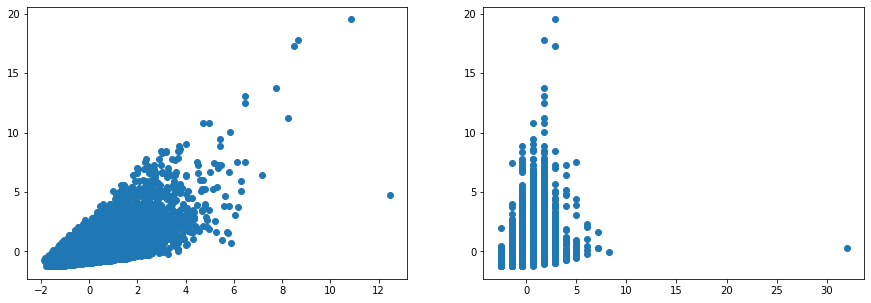

In [50]:
fig, ax = plt.subplots(ncols=2,figsize=(15,5))

x1 = scaled_and_parse_df[['sqft_living']]
y1 = scaled_and_parse_df[['price']]

x2 = scaled_and_parse_df[['bedrooms']]

ax[0].scatter(x1, y1)
ax[1].scatter(x2,y1);

In [51]:
# Upon looking at our scaled dataframe, we noticed that there is a house sold with 33 bedrooms for $600k
# After considering the price sold, sqft and number of bathrooms - the # of bedrooms appears 
# to be an error of somesort
# Since we explored bedrooms having a relatively small correlation to price, we are not too worried about this one
# outlier being included in our scatterplot

In [52]:
sk_lr = LinearRegression()

In [53]:
scaled_and_parse_df[['sqft_living']].isna().sum()

sqft_living    0
dtype: int64

In [54]:
scaled_and_parse_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21357 entries, 2494 to 15937
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             21357 non-null  float64
 1   bedrooms          21357 non-null  float64
 2   bathrooms         21357 non-null  float64
 3   sqft_living       21357 non-null  float64
 4   floors            21357 non-null  float64
 5   sqft_above        21357 non-null  float64
 6   sqft_living15     21357 non-null  int64  
 7   x0_11 Excellent   21357 non-null  float64
 8   x0_12 Luxury      21357 non-null  float64
 9   x0_13 Mansion     21357 non-null  float64
 10  x0_3 Poor         21357 non-null  float64
 11  x0_4 Low          21357 non-null  float64
 12  x0_5 Fair         21357 non-null  float64
 13  x0_6 Low Average  21357 non-null  float64
 14  x0_7 Average      21357 non-null  float64
 15  x0_8 Good         21357 non-null  float64
 16  x0_9 Better       21357 non-null  flo

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [56]:
X = scaled_and_parse_df[['sqft_living']]
y = scaled_and_parse_df['price']

In [57]:
sk_lr.fit(X,y)

LinearRegression()

In [58]:
sk_lr.score(X,y)

0.49192611525348107

In [59]:
# predict

preds = sk_lr.predict(X)


In [60]:
preds

array([ 0.24243538, -0.01729731, -0.4756491 , ..., -0.75066017,
       -0.51384508, -0.58259785])

In [61]:
resids = y - preds
resids

2494    -0.95
6729     0.31
8404     0.09
8800    -0.34
3553    -0.05
         ... 
16723   -0.11
3257     0.36
7614     0.20
20963    0.13
15937   -0.16
Name: price, Length: 21357, dtype: float64

In [62]:
#Create out bins

bins = int( len(X)**.5)
bins

146

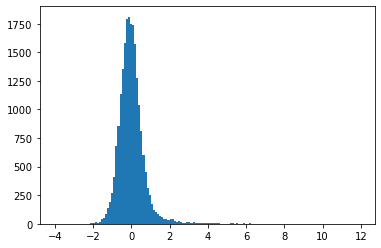

In [63]:
# Histogram of residuals

plt.hist(resids, bins=bins);

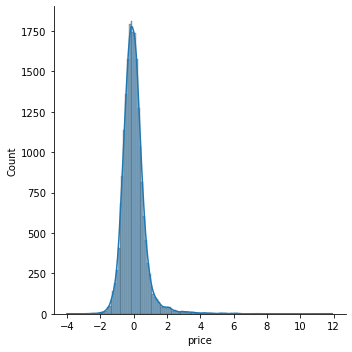

In [64]:
sns.displot(resids, bins=bins, kde=True)

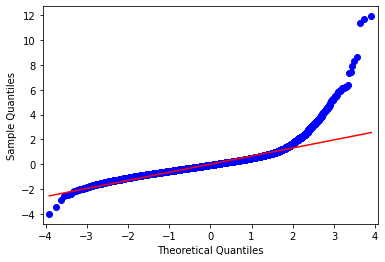

In [65]:
sm.qqplot(resids, line='r');

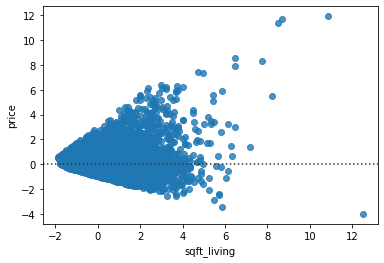

In [66]:
# resid plot sns.resid

sns.residplot(x=X, y=y);

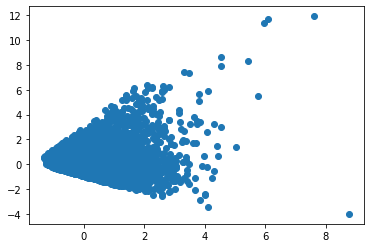

In [67]:
plt.scatter(preds, resids)